In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Import the results_with_mdds.csv file into a pandas dataframe
df_experiments_mdd = pd.read_csv('results_with_mdds.csv', delimiter=';')

# Remove the timeouts
df_experiments_mdd = df_experiments_mdd[df_experiments_mdd['TIME']!= 'timeout']

# Set data type 
df_experiments_mdd['TIME'] = df_experiments_mdd['TIME'].astype(float)
df_experiments_mdd['N_NODES'] = df_experiments_mdd['N_NODES'].astype(float)
df_experiments_mdd['N_EDGES'] = df_experiments_mdd['N_EDGES'].astype(float)

In [48]:
# Import the results_with_bdds.csv file into a pandas dataframe
df_experiments_bdd = pd.read_csv('results_with_bdds.csv', delimiter=';')

# Remove the timeouts
df_experiments_bdd = df_experiments_bdd[df_experiments_bdd['TIME']!= 'timeout']

# Set data type 
df_experiments_bdd['TIME'] = df_experiments_bdd['TIME'].astype(float)
df_experiments_bdd['N_NODES'] = df_experiments_bdd['N_NODES'].astype(float)
df_experiments_bdd['N_EDGES'] = 2 * (df_experiments_bdd['N_NODES'] - 2)

In [49]:
# Set origin for hue
df_experiments_mdd['Origin'] = 'MDD'
df_experiments_bdd['Origin'] = 'BDD'

# Remove the N_EDGES column from the dataframes
df_experiments_mdd = df_experiments_mdd.drop(columns=['R', 'AND_OPTIMIZATION', 'AND_THRESHOLD', 'REORDER_VARIABLES'])

# Remove from the MDD dataframe the rows having a PATH which is not in the BDD dataframe, and viceversa
df_experiments_mdd = df_experiments_mdd[df_experiments_mdd['PATH'].isin(df_experiments_bdd['PATH'])]
df_experiments_bdd = df_experiments_bdd[df_experiments_bdd['PATH'].isin(df_experiments_mdd['PATH'])]

# Concatenate the two dataframes
df_experiments = pd.concat([df_experiments_mdd, df_experiments_bdd])

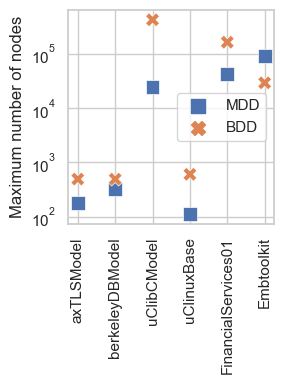

In [50]:
sns.set(style="whitegrid")
plt.figure(figsize=(3, 3.5))
markers = {"MDD": "s", "BDD": "X"}
df_experiments['PATH'] = df_experiments['PATH'].str.replace('.xml','')
ax = sns.scatterplot(x='PATH', y='N_NODES', data=df_experiments, hue='Origin', style='Origin', markers=markers)
plt.setp(ax.collections, sizes=[100])
ax.set(xlabel='', ylabel='Maximum number of nodes')
ax.set_yscale('log')
plt.xticks(rotation=90)
ax.legend()

plt.tight_layout()
plt.savefig('images/RQ4_nodes.pdf')

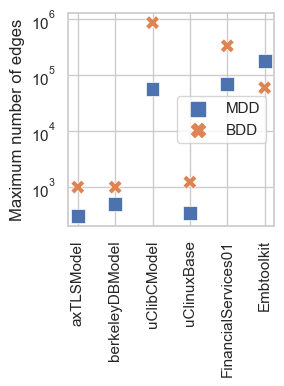

In [51]:
sns.set(style="whitegrid")
plt.figure(figsize=(3, 3.5))
markers = {"MDD": "s", "BDD": "X"}
ax = sns.scatterplot(x='PATH', y='N_EDGES', data=df_experiments, hue='Origin', style='Origin', markers=markers)
plt.setp(ax.collections, sizes=[100])
ax.set(xlabel='', ylabel='Maximum number of edges')
ax.set_yscale('log')
plt.xticks(rotation=90)
ax.legend()

plt.tight_layout()
plt.savefig('images/RQ4_edges.pdf')